# Experiments with the dynamic model

A region contaning one or more contaminated sites.

Each contaminated site is treated as a **task**.

Site may be contaminated by one or more dangerous products.

Every product is assumed to have a **risk** and a **transition rate** attribute.

Products may transform into one another at a **deterministic** rate:

  - A $\rightarrow$ B $\rightarrow$ C


On-site operations (different **duration**):
 - **Neutralize** a *target* product
 - **Remove** *all* products

A task is **completed** if product concentration falls bellow a threshold $\epsilon$.

Minimize the different **objective functions**:
 - Global risk
 - Max risk at any given time
 - Makespan


## Plotting solutions

Instance ../data/instances/stable.dat (global risk =  179.84073, makespan = None)


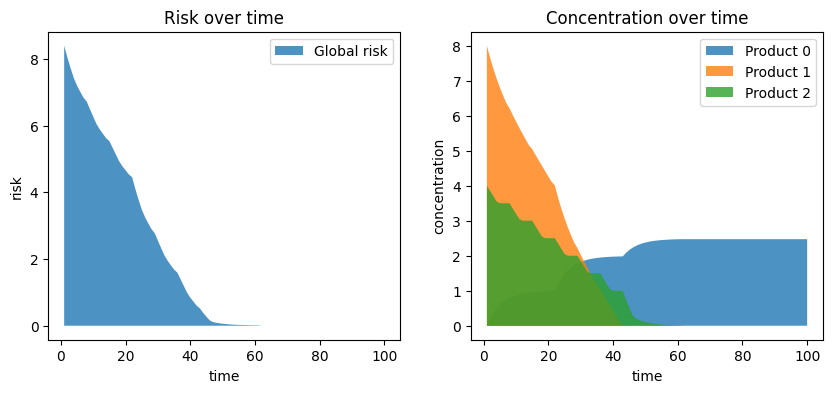

Instance ../data/instances/increasing.dat (global risk =  162.06920, makespan = None)


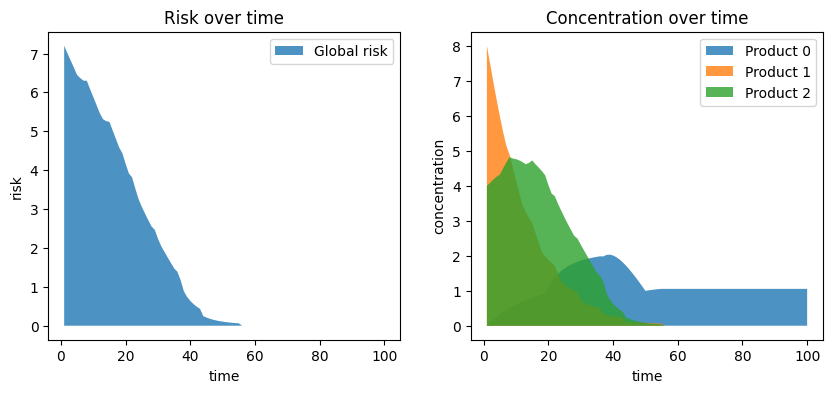

Instance ../data/instances/decreasing.dat (global risk =  147.65730, makespan = None)


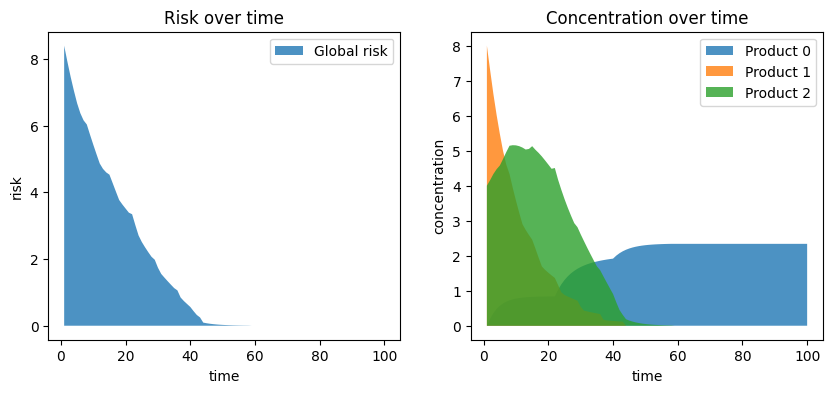

In [1]:
# import sys
# from IPython.utils import io

from optlis.dynamic.notebook_utils import plot_graphs

for instance_name in ("stable", "increasing", "decreasing"):
    plot_graphs(
        f"../data/instances/{instance_name}.dat",
        f"../data/solutions/{instance_name}.sol"
    )

# plot_graphs(
#     f"../data/instances/example-dynamic-single.dat",
#     f"../data/solutions/example-dynamic-single.sol"
# )

Instance ../output/hx-n8-pu-ru-q1.dat (global risk =  13.35831, makespan = None)


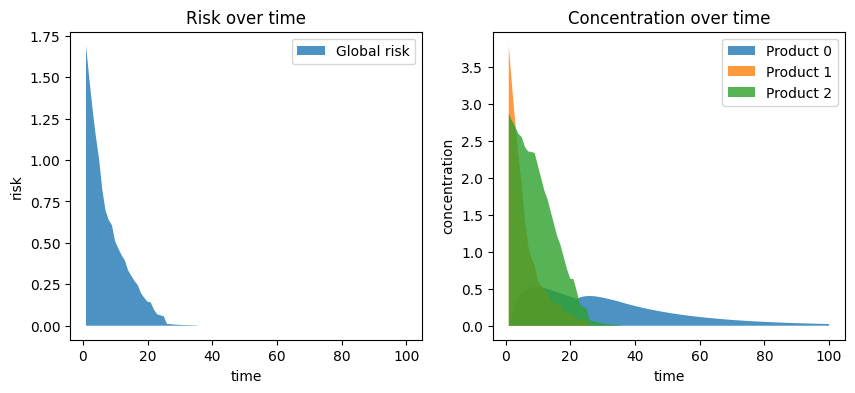

Instance ../output/hx-n16-pu-ru-q1.dat (global risk =  67.06248, makespan = None)


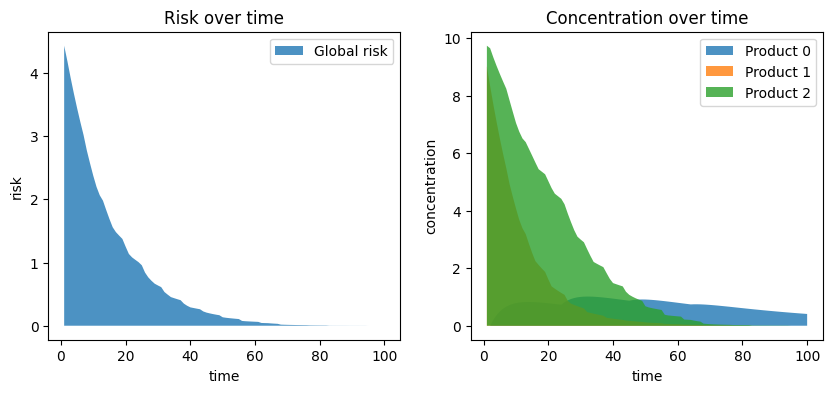

Instance ../output/hx-n32-pu-ru-q1.dat (global risk =  173.50228, makespan = None)


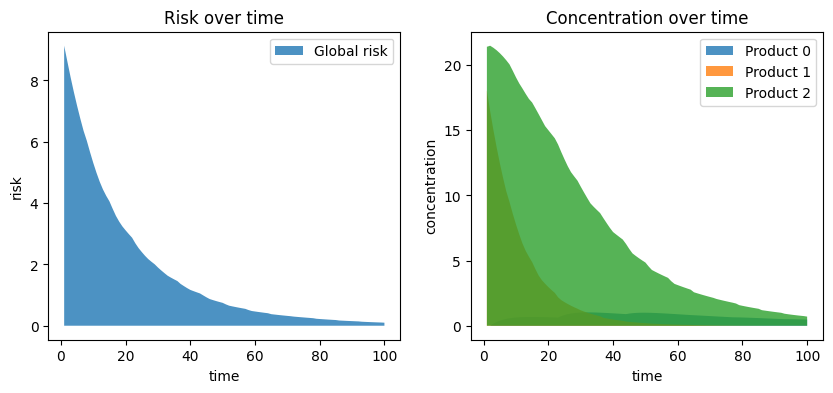

In [7]:
for n in (8, 16, 32):
    plot_graphs(
        f"../output/hx-n{n}-pu-ru-q1.dat",
        f"../output/hx-n{n}-pu-ru-q1.sol"
    )